# Fraud Detection with OneClassSvm(%84 recall)

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM 
from sklearn.model_selection import train_test_split
import datetime
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import norm

* In this kernel we will try to detection of fraud with OneClassSvm. We will make some visualizations , models and 
discussion.
* I suppose that you know the awesome "Credit Card Fraud Detection" Dataset so ı will not any description about that.
* if you liked my work, please upvote this kernel since it will keep me motivated for my other studies. 
Thank you for your suggestions and advice.

In [6]:
data = pd.read_csv("creditcard.csv")

In [7]:
print("Data columns:{}".format(data.columns))
print("Data shape :{}".format(data.shape))

Data columns:Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Data shape :(284807, 31)


In [8]:
describe = data[["Time","Amount","V1","V10","V27"]].describe().T
describe.style.background_gradient(cmap="inferno")

,count,mean,std,min,25%,50%,75%,max
Time,284807.000000,94813.859575,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
Amount,284807.000000,88.349619,250.120109,0.000000,5.600000,22.000000,77.165000,25691.160000
V1,284807.000000,0.000000,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V10,284807.000000,0.000000,1.088850,-24.588262,-0.535426,-0.092917,0.453923,23.745136
V27,284807.000000,-0.000000,0.403632,-22.565679,-0.070840,0.001342,0.091045,31.612198


In [9]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Visualizations

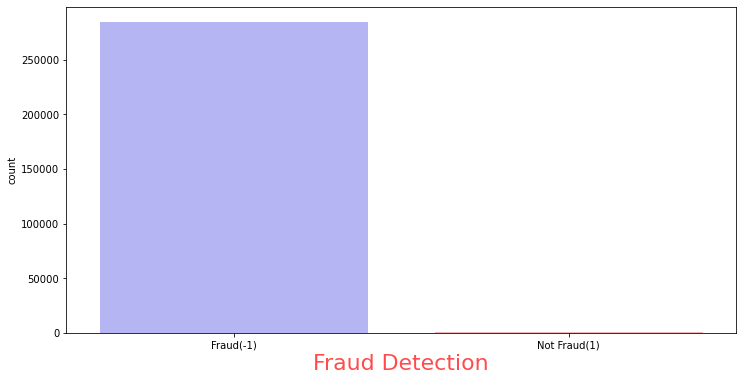

In [11]:

plt.figure(figsize=(12,6))
sns.countplot(x="Class", data=data, palette="bwr")
plt.xticks(np.arange(2),("Fraud(-1)", "Not Fraud(1)"))
plt.xlabel("Fraud Detection" , color="red", alpha=0.7, size=22)
plt.show()

In [12]:
print(data["Class"].value_counts())

0    284315
1       492
Name: Class, dtype: int64


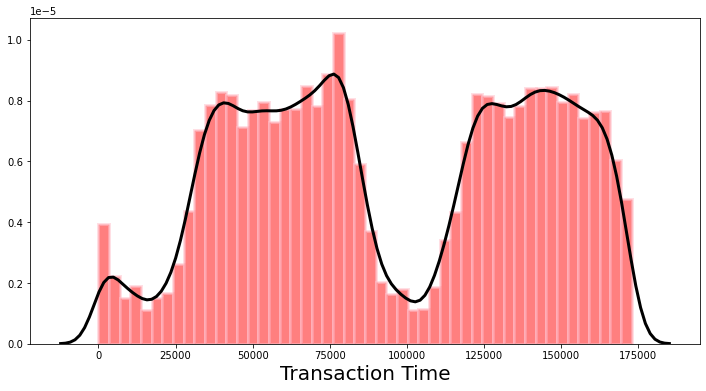

In [13]:
plt.figure(figsize=(12,6))
sns.distplot(data["Time"], color="red", bins=50, kde=True,  
             hist_kws={"linewidth": 3,"alpha": 0.5,"edgecolor":"pink"},
             kde_kws={"color": "k", "lw": 3})

plt.xlabel("Transaction Time", size=20)
plt.show()

In [14]:
time = data.groupby("Class")["Time"].mean()
time
#-1 fraud 

Class
0    94838.202258
1    80746.806911
Name: Time, dtype: float64

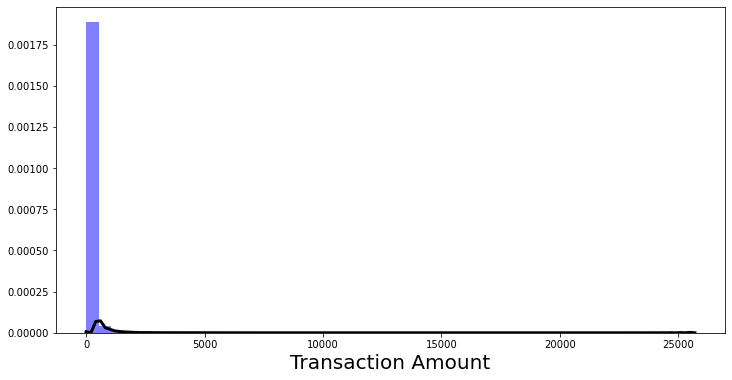

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(data["Amount"], color="blue", kde=True,  
             hist_kws={"linewidth": 3,"alpha": 0.5},
             kde_kws={"color": "k", "lw": 3})
plt.xlabel("Transaction Amount", size=20)
plt.show()

In [16]:
amount = data.groupby("Class")["Amount"].mean()
amount
#-1 fraud 

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

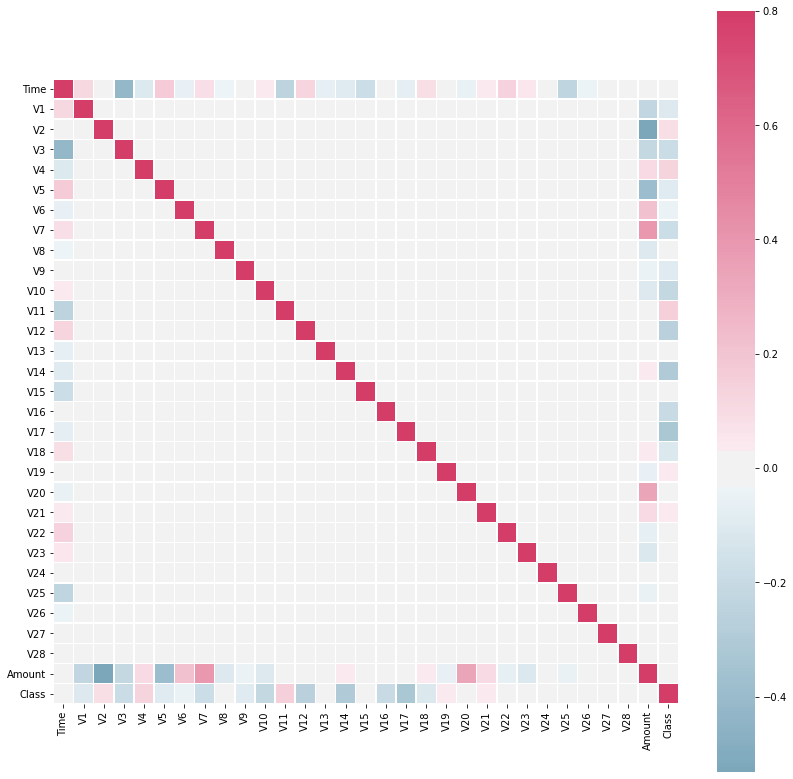

In [17]:
f, ax = plt.subplots(figsize=(14, 14))
data_corr = data.corr()
cmap = sns.diverging_palette(230, 0, as_cmap=True)
sns.heatmap(data_corr,cmap=cmap, vmax=.8, center=0, square=True, linewidths=.5, fmt=":.2f")
plt.show()

In [18]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

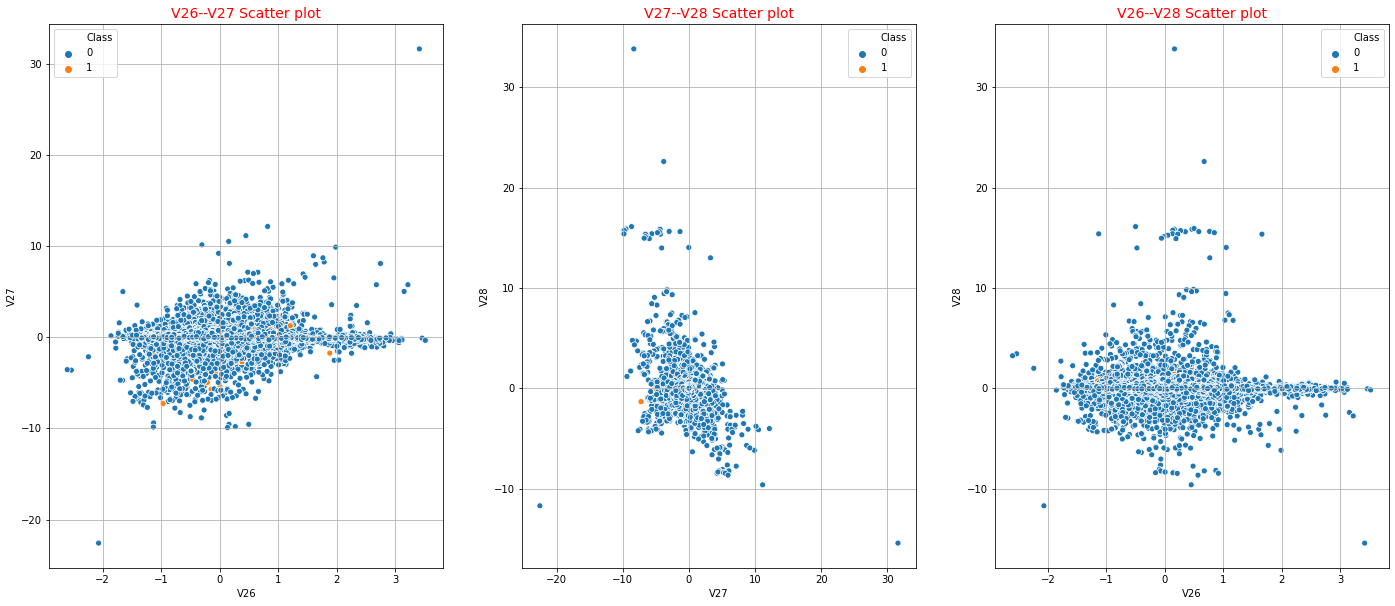

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24, 10))

sns.scatterplot(x=data["V26"], y=data["V27"], hue=data["Class"], ax=ax1)
ax1.set_title('V26--V27 Scatter plot', fontsize=14, color="red")
ax1.grid()
ax1.legend()

sns.scatterplot(x=data["V27"], y=data["V28"], hue=data["Class"], ax=ax2)
ax2.set_title('V27--V28 Scatter plot', fontsize=14, color="red")
ax2.grid()
ax2.legend()

sns.scatterplot(x=data["V26"], y=data["V28"], hue=data["Class"], ax=ax3)
ax3.set_title('V26--V28 Scatter plot', fontsize=14, color="red")
ax3.legend()
ax3.grid()
plt.show()

In [20]:
data.loc[data['Class'] == 1, "Class"] = -1
data.loc[data['Class'] == 0, "Class"] = 1
data = data.drop(["V27"], axis=1)

I have not any logical reason can explain for removing V27. But with this step models precision value increase 2% at the same time it detect more 1 fraud process. But ı think that V28 or V27 distrupt distribution when ı investigate scatter plots

In [21]:
#getting random set of nonfraud data to train on
non_fraud = data[data['Class']==1]
fraud = pd.DataFrame(data[data['Class']==-1])

#ONEClassSVM yapısı gereği sadece nonfraud olan örnekler ile eğitiyoruz.
df_train_nonfraud, df_test_nonfraud = train_test_split(non_fraud, test_size=0.3, random_state=40)
print(df_train_nonfraud.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V28', 'Amount', 'Class'],
      dtype='object')


# Scaler Types and selection
# which one should we choose ? why?

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [23]:
standard_scaler = StandardScaler()


df_train_nonfraud_label = df_train_nonfraud["Class"].values
df_train_nonfraud = df_train_nonfraud.drop(["Class"], axis=1)
df_train_nonfraud = standard_scaler.fit_transform(df_train_nonfraud)
df_train_nonfraud = pd.DataFrame(df_train_nonfraud)

df_test_nonfraud_labels = df_test_nonfraud["Class"]
df_test_nonfraud= pd.DataFrame(df_test_nonfraud.drop(["Class"], axis=1))
df_test_nonfraud = standard_scaler.fit_transform(df_test_nonfraud)
df_test_nonfraud = pd.DataFrame(df_test_nonfraud)

fraud_labels =fraud["Class"]
fraud=  pd.DataFrame(fraud.drop(["Class"], axis=1))
fraud = standard_scaler.fit_transform(fraud)
fraud = pd.DataFrame(fraud)

In [24]:
MinMaxScaler = MinMaxScaler()
df_train_nonfraud_minm = MinMaxScaler.fit_transform(df_train_nonfraud)
fraud_minm = MinMaxScaler.fit_transform(fraud)
fraud_minm = pd.DataFrame(fraud_minm)

robust = RobustScaler()
df_train_nonfraud_rob = robust.fit_transform(df_train_nonfraud)
fraud_rob = robust.fit_transform(fraud)
fraud_rob = pd.DataFrame(fraud_rob)

normalizer = Normalizer()
df_train_nonfraud_nor = normalizer.fit_transform(df_train_nonfraud)
fraud_nor = normalizer.fit_transform(fraud)
fraud_nor = pd.DataFrame(fraud_nor)

* Scaling is our second station. This topic can be basic and easly but we must be careful. our model's life depends on cotton thread.
* Thread is scaling for us. Lets we draw some graph and be clear.

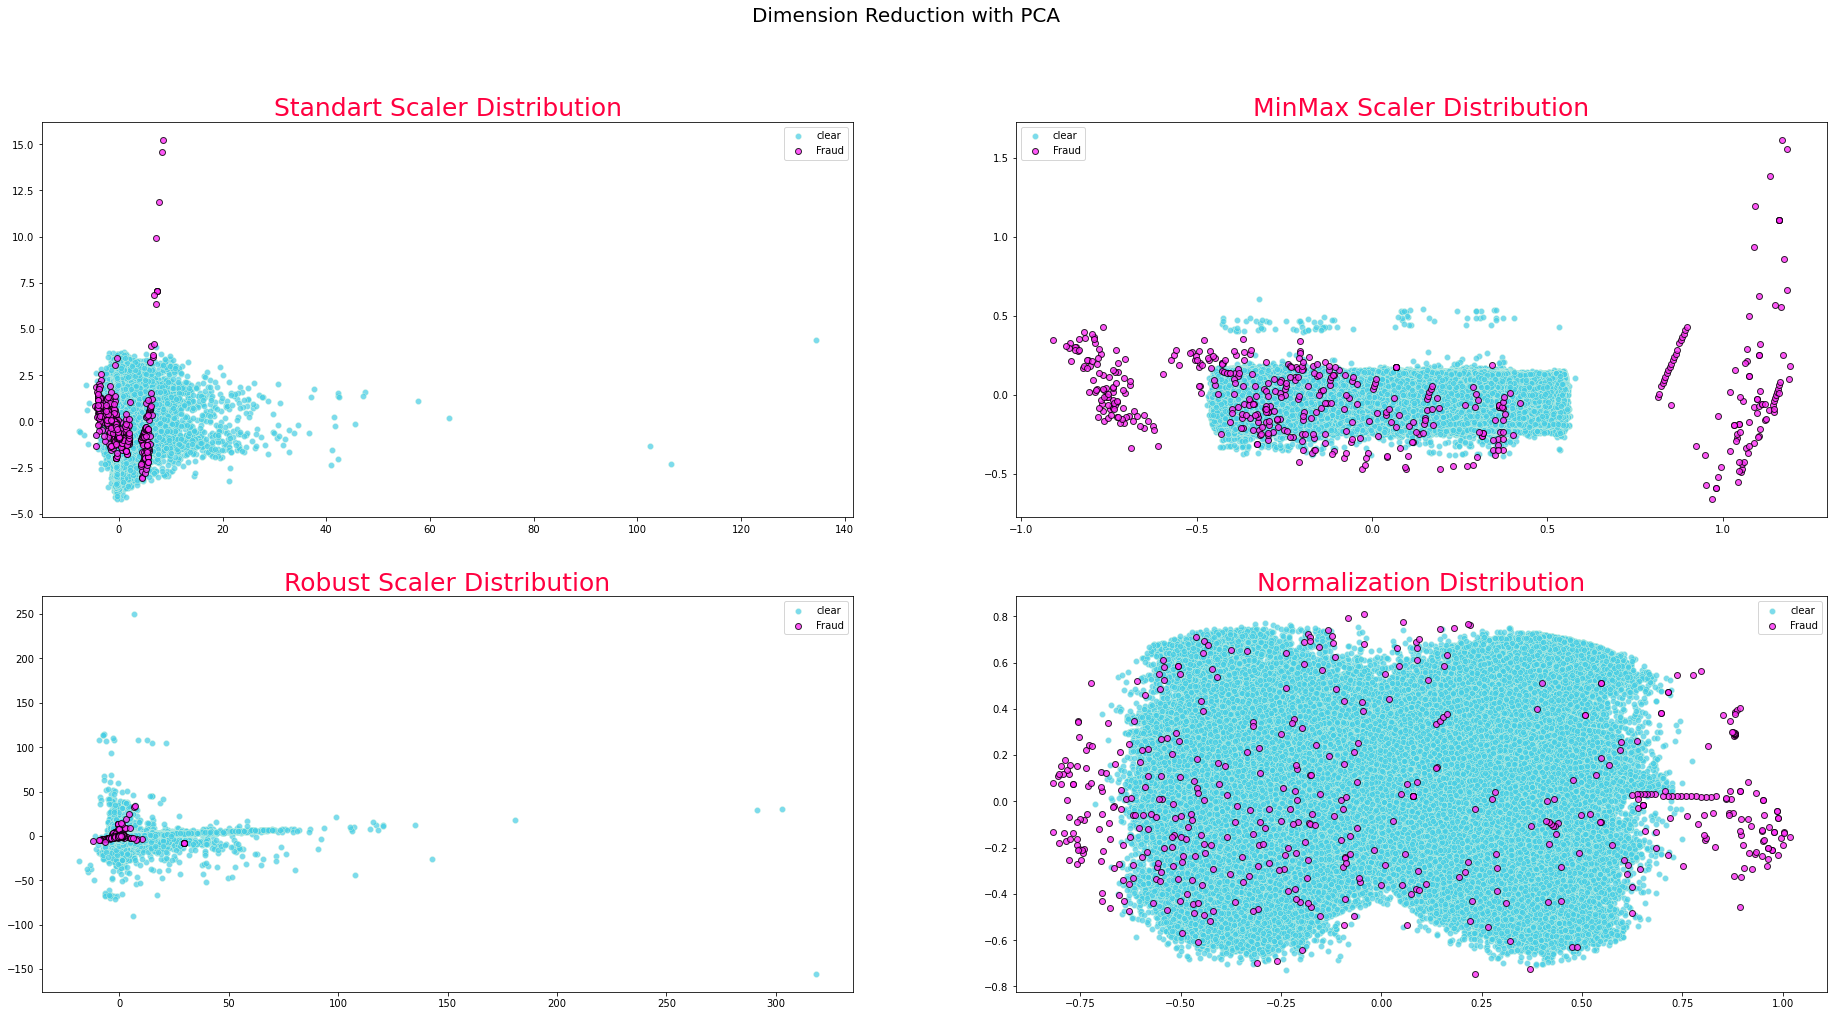

In [25]:
from sklearn.decomposition import PCA

#StandartScaler
pca_reduc_nonfraud = PCA(n_components=2, random_state=0).fit_transform(df_train_nonfraud)
pca_reduc_fraud = PCA(n_components=2, random_state=0).fit_transform(fraud)
#MinMAxScaler
pca_reduc_nonfraud_minm = PCA(n_components=2, random_state=0).fit_transform(df_train_nonfraud_minm)
pca_reduc_fraud_minm = PCA(n_components=2, random_state=0).fit_transform(fraud_minm)
#RobustScaler
pca_reduc_nonfraud_rob = PCA(n_components=2, random_state=0).fit_transform(df_train_nonfraud_rob)
pca_reduc_fraud_rob = PCA(n_components=2, random_state=0).fit_transform(fraud_rob)
#Normalizer
pca_reduc_nonfraud_nor = PCA(n_components=2, random_state=0).fit_transform(df_train_nonfraud_nor)
pca_reduc_fraud_nor = PCA(n_components=2, random_state=0).fit_transform(fraud_nor)

fig, axs = plt.subplots(2, 2, figsize=(32,16))
fig.suptitle("Dimension Reduction with PCA", size=20)

axs[0,0].scatter(pca_reduc_nonfraud[:,0], pca_reduc_nonfraud[:,1], color="#45CDE5", label=("clear"), linewidth=0.5, alpha=0.7, edgecolors="#E0F8E0")
axs[0,0].scatter(pca_reduc_fraud[:,0], pca_reduc_fraud[:,1], color="#FE2EF7",  label=("Fraud"), linewidth=1, alpha=0.8, edgecolors="black")
axs[0,0].set_title("Standart Scaler Distribution", color="#FF0040", size=25)
axs[0,0].legend()

axs[0,1].scatter(pca_reduc_nonfraud_minm[:,0], pca_reduc_nonfraud_minm[:,1], color="#45CDE5", label=("clear"), linewidth=0.5, alpha=0.7, edgecolors="#E0F8E0")
axs[0,1].scatter(pca_reduc_fraud_minm[:,0], pca_reduc_fraud_minm[:,1], color="#FE2EF7",  label=("Fraud"), linewidth=1, alpha=0.8, edgecolors="black")
axs[0,1].set_title("MinMax Scaler Distribution", color="#FF0040", size=25)
axs[0,1].legend()

axs[1,0].scatter(pca_reduc_nonfraud_rob[:,0], pca_reduc_nonfraud_rob[:,1], color="#45CDE5",  label=("clear"), linewidth=0.5, alpha=0.7, edgecolors="#E0F8E0")
axs[1,0].scatter(pca_reduc_fraud_rob[:,0], pca_reduc_fraud_rob[:,1], color="#FE2EF7", label=("Fraud"), linewidth=1, alpha=0.8, edgecolors="black")
axs[1,0].set_title("Robust Scaler Distribution", color="#FF0040", size=25)
axs[1,0].legend()

axs[1,1].scatter(pca_reduc_nonfraud_nor[:,0], pca_reduc_nonfraud_nor[:,1], color="#45CDE5",  label=("clear"), linewidth=0.5, alpha=0.7, edgecolors="#E0F8E0")
axs[1,1].scatter(pca_reduc_fraud_nor[:,0], pca_reduc_fraud_nor[:,1], color="#FE2EF7",  label=("Fraud"), linewidth=1, alpha=0.8, edgecolors="black")
axs[1,1].set_title("Normalization Distribution", color="#FF0040", size=25)
axs[1,1].legend()

1. Our goal is protect outliers and original distribution while make scaling. That's show why we use Standard Scaler.
2. On the other hand ı was try these techniques after than ı see that most successful scale is StandardS. So I explain this topic with that way.
3. Finally robust scaler look pretty but pay attention to the interval.

In [26]:
# OneClassSVM

we arrive the critical point eventually. Our models learn only non_fraud data. When model face to any fraud data it says that "Wow ı dont know this topic so ı will classify with different label which -1"¶
that is the story about OneClassSVM how to work.

In [27]:
start = datetime.datetime.now()

model = OneClassSVM(kernel='poly', nu=0.0005,gamma=0.07, degree=3, coef0=0.02)
model.fit(df_train_nonfraud)

finish = datetime.datetime.now()
print("Time taken:" ,(finish-start))

Time taken: 0:01:31.189223


* nu : "slackness"
* gamma : a distance metric which affected by a sample
* degree : poly degree (default 3 for more complex boundaries you can increase that.)
* kernel : Specifies the kernel type to be used in the algorithm.

In [28]:
X_test = pd.concat([df_test_nonfraud,fraud])

y_test= pd.concat([df_test_nonfraud_labels,fraud_labels])

In [29]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.50      0.84      0.63       492
           1       1.00      1.00      1.00     85295

    accuracy                           0.99     85787
   macro avg       0.75      0.92      0.81     85787
weighted avg       1.00      0.99      1.00     85787



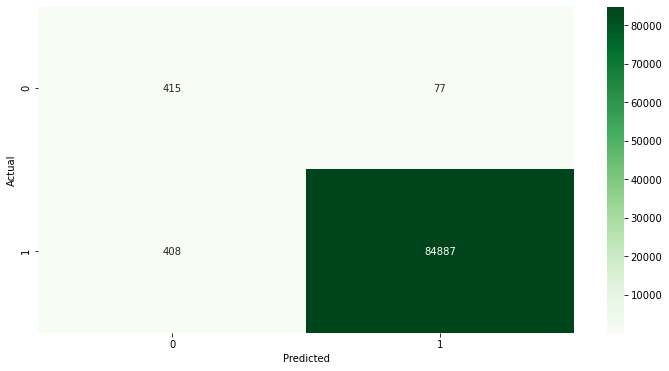

In [30]:
plt.figure(figsize=(12,6))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, fmt="g", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Over Fitting or Not ?

In [31]:
df_train_nonfraud_label = pd.DataFrame(df_train_nonfraud_label)

df_train_nonfraud_label.iloc[:, 0].value_counts()
# we use only non-fraud data

1    199020
Name: 0, dtype: int64

In [32]:
from sklearn.model_selection import KFold
# df_train_nonfraud_label is df_Train labels

cv = KFold(n_splits=5,shuffle=True, random_state=0)
# this process takes 11 minute.

for train_index, test_index in cv.split(df_train_nonfraud):
    
    X_train, X_val = df_train_nonfraud.iloc[train_index], df_train_nonfraud.iloc[test_index]
    y_train, y_val = df_train_nonfraud_label.iloc[train_index], df_train_nonfraud_label.iloc[test_index]
    train_set = pd.concat([X_train,y_train],axis=1)
    
 
    # ********model start *********
    start = datetime.datetime.now()
    model = OneClassSVM(kernel='poly', nu=0.0005,gamma=0.07, degree=3, coef0=0.02)
    model.fit(X_train)
    finish = datetime.datetime.now()
    print("Time taken:" ,(finish-start))
     
    #*********model predict ************
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))
    print("*"*50)

Time taken: 0:00:39.929966
              precision    recall  f1-score   support

          -1       0.47      0.85      0.60       492
           1       1.00      0.99      1.00     85295

    accuracy                           0.99     85787
   macro avg       0.73      0.92      0.80     85787
weighted avg       1.00      0.99      0.99     85787

**************************************************
Time taken: 0:01:25.234095
              precision    recall  f1-score   support

          -1       0.46      0.84      0.59       492
           1       1.00      0.99      1.00     85295

    accuracy                           0.99     85787
   macro avg       0.73      0.92      0.79     85787
weighted avg       1.00      0.99      0.99     85787

**************************************************
Time taken: 0:01:38.202827
              precision    recall  f1-score   support

          -1       0.44      0.85      0.58       492
           1       1.00      0.99      1.00     85295


# cross validation show us a little bit over-fitting for our first model. But we can handle that amounts.
I think recall is cool but can we increase precision score ?
1. what happens if we care only recall value ?
2. does it make sense ? (I think no !)
Second model;

In [33]:
"""lets make some modification on model parameters"""

start = datetime.datetime.now()

model = OneClassSVM(kernel='poly', nu=0.0005,gamma=0.007, degree=5)
model.fit(df_train_nonfraud)

finish = datetime.datetime.now()
print("Time taken:" ,(finish-start))


X_test = pd.concat([df_test_nonfraud,fraud])
y_test= pd.concat([df_test_nonfraud_labels,fraud_labels])

Time taken: 0:00:13.941952


In [34]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.01      0.96      0.01       492
           1       1.00      0.12      0.22     85295

    accuracy                           0.13     85787
   macro avg       0.50      0.54      0.12     85787
weighted avg       0.99      0.13      0.22     85787



# model 2 results: you can see that "trade of" between precision and recall values.

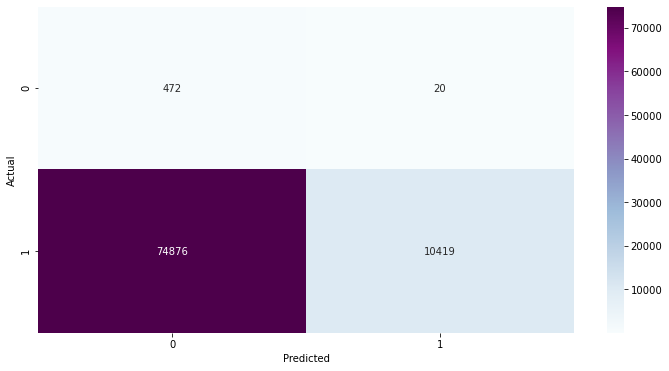

In [35]:
plt.figure(figsize=(12,6))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, fmt="g", cmap="BuPu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()